In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [40]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [41]:
#read the csv file and print the shape of the dataset
yelp = pd.read_csv("C:/Users/Rikul/Desktop/Data Mining/Data Mining Project/archive/yelp.csv")
yelp.shape

(5261668, 9)

In [42]:
#drop all the rows with NaN
yelp = yelp.dropna()
yelp.shape

(5261668, 9)

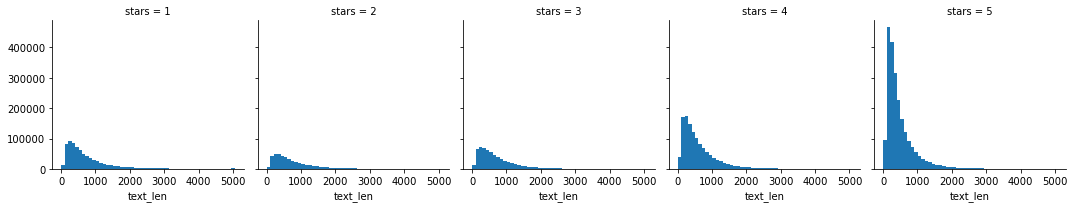

In [43]:
#add one more column to find out the relation between length vs number of reviews vs stars
yelp['text_len'] = yelp['text'].apply(len)
g = sns.FacetGrid(data=yelp, col='stars')
g.map(plt.hist, 'text_len', bins=50)

In [44]:
#This shuffles the data which help us to get the random tuple each time
from sklearn.utils import shuffle
yelp = shuffle(yelp)

In [45]:
#Defined two list for getting the postitives and negative reviews
positive_reviews = []
negative_reviews = []

In [46]:
#Get the 1600 positive reviews
p_counter = 0
index = 0
while p_counter != 1600:
    st = yelp['stars'][index]
    if (st == 5):
        positive_reviews.append(yelp['text'][index])
        p_counter = p_counter + 1
    index = index + 1
print(len(positive_reviews))

1600


In [47]:
#Get the 1600 negative reviews
n_counter = 0
index = 0
while n_counter != 1600:
    st = yelp['stars'][index]
    if(st == 1 or st == 2):
        negative_reviews.append(yelp['text'][index])
        n_counter = n_counter + 1
    index = index + 1
print(len(negative_reviews))

1600


In [48]:
#Tokenizer which tokenise the text into works and clean the data to prepare for NLP
def my_tokenizer(text):
    text = text.lower() # downcase
    tokens = nltk.tokenize.word_tokenize(text) # split string into words (tokens)
    tokens = [t for t in tokens if len(t) > 2] # remove short words, they're probably not useful (punctuation)
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens] # put words into base form
    tokens = [t for t in tokens if t not in stopwords.words('english')] # remove stopwords    
    return tokens

In [49]:
#Dictionary and list defination for further use
word_index_map = {}
current_index = 0
positive_tokenized = []
negative_tokenized = []
orig_reviews = []

In [50]:
#Create dictionary for word count --> word_count_map from positive and negative reviews
for review in positive_reviews:
    orig_reviews.append(review)
    tokens = my_tokenizer(review)
    positive_tokenized.append(tokens)
    for token in tokens:
        if token not in word_index_map:
            word_index_map[token] = current_index
            current_index += 1

for review in negative_reviews:
    orig_reviews.append(review)
    tokens = my_tokenizer(review)
    negative_tokenized.append(tokens)
    for token in tokens:
        if token not in word_index_map:
            word_index_map[token] = current_index
            current_index += 1

print("len(word_index_map):", len(word_index_map))

len(word_index_map): 18162


In [51]:
# Creation our input matrices by converting tokens to vector
def tokens_to_vector(tokens, label):
    x = np.zeros(len(word_index_map) + 1) # last element is for the label
    for t in tokens:
        i = word_index_map[t]
        x[i] += 1
    x = x / x.sum() # normalize it before setting label
    x[-1] = label
    return x

In [52]:
N = len(positive_tokenized) + len(negative_tokenized)
# (N x D+1 matrix - keeping them together for now so we can shuffle more easily later
data = np.zeros((N, len(word_index_map) + 1))
i = 0

for tokens in positive_tokenized:
    xy = tokens_to_vector(tokens, 1)
    data[i,:] = xy
    i += 1

for tokens in negative_tokenized:
    xy = tokens_to_vector(tokens, 0)
    data[i,:] = xy
    i += 1

In [53]:
#train and test feature selection
X = data[:,:-1]
Y = data[:,-1]

In [54]:
# Apply machine learning algrithms for data mining

# Function for evaluating the model
def evaluate(y_test, y_predict):
    cf_matrix = confusion_matrix(y_test,y_predict)
    sns.heatmap(cf_matrix, annot = True, fmt = 'd',cmap="Blues")
    plt.title('Heatmap of confusion matrix for Test data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    print("Precision Score: ", precision_score(y_test,y_predict)*100)
    print("Recall Score: ", recall_score(y_test,y_predict)*100)
    print("Acuracy score: ",accuracy_score(y_test,y_predict)*100)
    print("F1 score: ",f1_score(y_test,y_predict)*100)


Classification Algotithm - LOGISTIC REGRESSION
Precision Score:  77.31277533039648
Recall Score:  76.13882863340564
Acuracy score:  77.8125
F1 score:  76.72131147540982


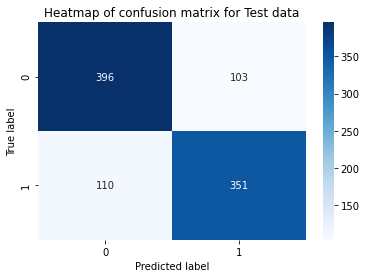

In [55]:
#Classification using Logistic Regrassion
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial', tol=1e-2, solver='newton-cg', max_iter=15)
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)

print("\nClassification Algotithm - LOGISTIC REGRESSION")
evaluate(y_test, y_predict)


Classification Algotithm - SVC
Precision Score:  92.85714285714286
Recall Score:  80.60000000000001
Acuracy score:  86.66666666666667
F1 score:  86.29550321199144


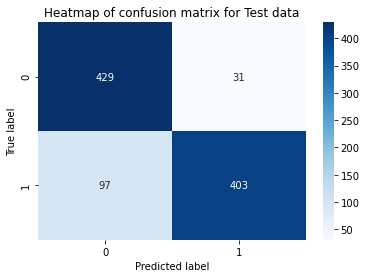

In [56]:
#Classification using SUPPORT VECTOR MACHINE
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
from sklearn import svm
clf = svm.SVC(gamma=2, C=2)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print("\nClassification Algotithm - SVC")
evaluate(y_test, y_predict)


Classification Algotithm - DECISION TREE
Precision Score:  74.72527472527473
Recall Score:  72.1868365180467
Acuracy score:  74.375
F1 score:  73.4341252699784


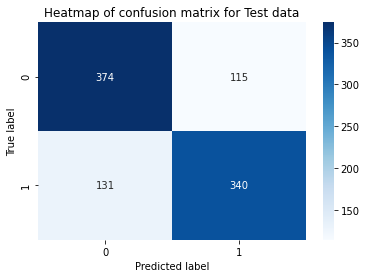

In [57]:
#Classification using DECISION TREE
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
from sklearn import tree
dt = tree.DecisionTreeClassifier(max_depth=25)
dt.fit(X_train, y_train)
y_predict = dt.predict(X_test)
print("\nClassification Algotithm - DECISION TREE")
evaluate(y_test, y_predict)


Classification Algotithm - NAIVE BAYES
Precision Score:  66.4190193164933
Recall Score:  99.33333333333333
Acuracy score:  76.14583333333333
F1 score:  79.60819234194123


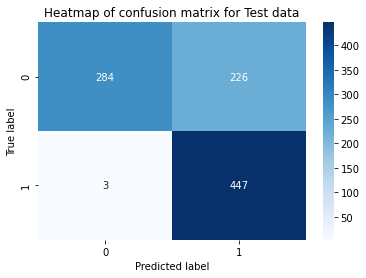

In [58]:
#Classification using NAIVE BAYES
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_predict = nb.predict(X_test)
print("\nClassification Algotithm - NAIVE BAYES")
evaluate(y_test, y_predict)